# *Лабораторная №1*

*Цель лабораторной работы: Познакомиться с основными возможностями библиотеки Pandas для анализа и обработки данных. Научиться выполнять загрузку данных, их очистку, трансформацию, анализ и визуализацию.*

### Задача 1: Загрузка и первичный анализ данных

Импортируйте необходимые библиотеки (Pandas, Matplotlib/Seaborn)

In [72]:
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sb

Выведите первые 10 записей из таблицы

In [73]:
gs = pd.read_csv('./data/gender_submission.csv')
gs[0:10]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [74]:
test = pd.read_csv('./data/test.csv')
test[0:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [75]:
train =  pd.read_csv('./data/train.csv')
train[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Определите размерность данных, количество пустых значений в каждом столбце и типы данных.

In [76]:
gs_shape = gs.shape

print(f"Количество Строк gender_submission: {gs_shape[0]}\n\n")

print(f"Количество Столбцов gender_submission: {gs_shape[1]}\n\n")

print(f'Размерность таблицы: {gs_shape[0] * gs_shape[1]}\n\n')

print(f"Количество пустых значений в каждом столбце и типы данных:\n", gs.isnull().sum(), sep='')

Количество Строк gender_submission: 418


Количество Столбцов gender_submission: 2


Размерность таблицы: 836


Количество пустых значений в каждом столбце и типы данных:
PassengerId    0
Survived       0
dtype: int64


In [77]:
test_shape = test.shape

print(f"Количество Строк gender_submission: {test_shape[0]}\n\n")

print(f"Количество Столбцов gender_submission: {test_shape[1]}\n\n")

print(f'Размерность таблицы: {test_shape[0] * test_shape[1]}\n\n')

print(f"Количество пустых значений в каждом столбце и типы данных:\n", test.isnull().sum(), sep='')

Количество Строк gender_submission: 418


Количество Столбцов gender_submission: 11


Размерность таблицы: 4598


Количество пустых значений в каждом столбце и типы данных:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [78]:
train_shape = train.shape

print(f"Количество Строк gender_submission: {train_shape[0]}\n\n")

print(f"Количество Столбцов gender_submission: {train_shape[1]}\n\n")

print(f'Размерность таблицы: {train_shape[0] * train_shape[1]}\n\n')

print(f"Количество пустых значений в каждом столбце и типы данных:\n", train.isnull().sum(), sep='')

Количество Строк gender_submission: 891


Количество Столбцов gender_submission: 12


Размерность таблицы: 10692


Количество пустых значений в каждом столбце и типы данных:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Задача 2: Очистка и подготовка данных

Удалите столбцы, которые не будут использоваться в анализе

In [79]:
# Создаём общую таблицу из всех предоставленных

big_table = gs.join(other=test, rsuffix='_test').join(train, rsuffix='_train')

for column in big_table:
    if str(column).endswith('_test') or str(column).endswith('_train'):
        big_table = big_table.drop(columns=[column])

big_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
# Удаляем колонки, в которых все значения уникальны  не повторяются

for column in big_table.columns:
    if len(big_table[column].unique()) == len(big_table):
        big_table = big_table.drop(columns=[column])

big_table

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,male,NaN,0,0,359309,8.0500,NaN,S


Заполните пропущенные значения в столбце возраста (например, медианным значением возраста)

In [81]:
mid_age = (big_table.Age.sum() / len(big_table)).round(1)

big_table.Age = big_table.Age.fillna(mid_age)

big_table

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,male,24.0,0,0,359309,8.0500,NaN,S


Преобразуйте категориальные переменные в числовые (например, пол пассажиров)

In [82]:

def str_to_text_column(column: pd.core.series.Series):
    values = column.unique()
    index_value = range(0, len(values))
    correspondence = dict(zip(values, index_value))
    
    return correspondence

big_table.Sex = big_table.Sex.apply(lambda x: str_to_text_column(big_table.Sex)[x])
# big_table.Embarked = big_table.Embarked.apply(lambda x: str_to_text_column(big_table.Embarked)[x])

big_table

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,1,47.0,1,0,363272,7.0000,NaN,S
2,0,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,0,27.0,0,0,315154,8.6625,NaN,S
4,1,3,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,1,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,0,24.0,0,0,359309,8.0500,NaN,S


## Графики

<Axes: >

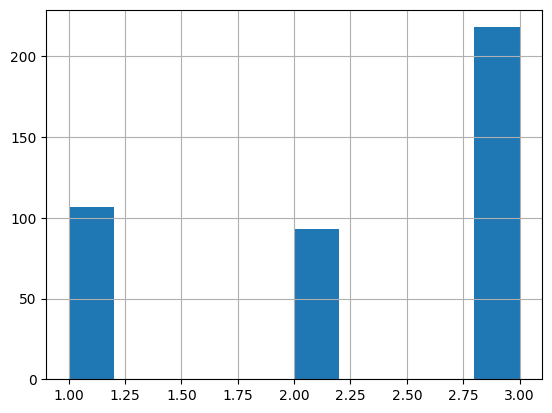

In [83]:
big_table.Pclass.hist()

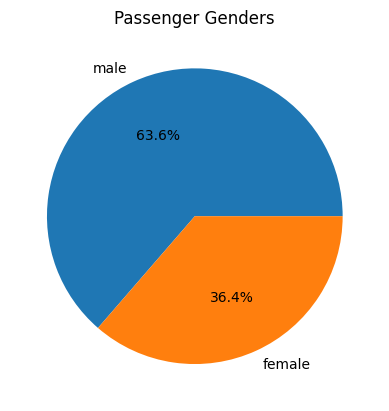

In [84]:
big_table_sex = list(big_table.Sex)

male = big_table_sex.count(0)
female = big_table_sex.count(1)

values = [male, female]
labels = ['male', 'female']



pt.pie(values, labels=labels, autopct='%1.1f%%')
pt.title('Passenger Genders')
pt.show()

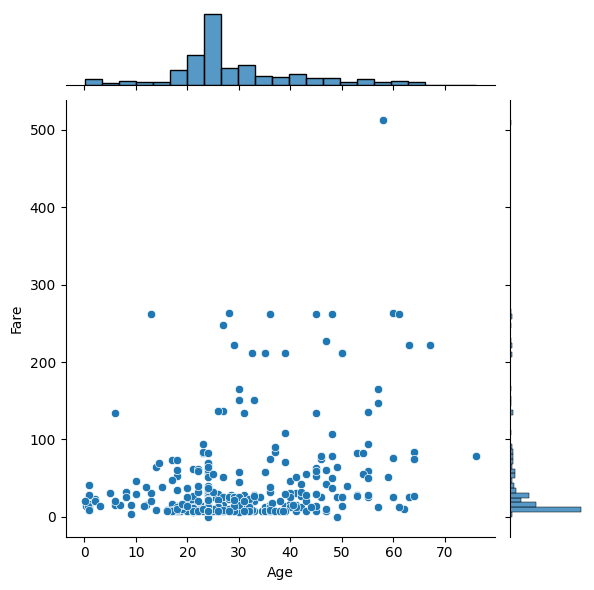

In [85]:
sb.jointplot(x='Age', y='Fare', data=big_table) 